In [1]:
% pylab inline
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv('C:/Users/789/Downloads/Project-20190610T121514Z-001/Project/housing.csv')

In [3]:
train.shape

(20640, 10)

In [4]:
#printing first few rows
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
train['total_bedrooms']=train['total_bedrooms'].fillna(train['total_bedrooms'].mean())

In [7]:
train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [8]:
train['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
train['ocean_proximity']=le.fit_transform(train['ocean_proximity'])

In [11]:
train.ocean_proximity.value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [12]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [13]:
X=train.drop('median_house_value',axis=1)
y=train.median_house_value

In [14]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
independent_scaler=StandardScaler()
X_train=independent_scaler.fit_transform(X_train)
X_test=independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266 ]]
test data
[[ 2.85347282e-01  1.95100000e-01 -2.86323693e-01 -5.22861572e-01
  -1.49476515e-03 -3.03010896e-02 -3.70086730e-01 -1.15508475e+00
  -1.12426599e-01]
 [ 6.09747178e-02 -2.35490539e-01  1.10435019e-01  1.38415277e-01
  -1.49476515e-03  1.21850767e-01  2.20531996e-01 -7.08659050e-01
  -1.12426599e-01]
 [-1.42487026e+00  1.00947776e+00  1.85617335e+00  5.46309967e-01
  -1.49476515e-03 -1.02419310e-01  1.21539643e+00 -2.104

In [16]:
#performing linear regression
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [17]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#predict on the test data
ypred=lin.predict(X_test)

In [19]:
print(len(ypred))
print(len(y_test))

4128
4128


In [20]:
print(ypred[0:5])
print(y_test[0:5])

[ 75616.18733782 166419.13655163 264751.07303087 275770.17606472
 278280.66805524]
20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64


In [21]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
rmse=sqrt(mean_squared_error(y_test,ypred))

In [23]:
print("rmse:",rmse)

rmse: 71098.69982050033


In [24]:
r2=r2_score(y_test,ypred)

In [25]:
print("R2 score:",r2)

R2 score: 0.6142406531011786


In [26]:

from sklearn.tree import DecisionTreeRegressor

In [27]:
dtree_reg = DecisionTreeRegressor(max_depth=9)

In [28]:
dtree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [29]:
dtree_ypred=dtree_reg.predict(X_test)

In [30]:
dtree_ypred

array([ 60503.2556391 ,  75919.52054795, 478283.56097561, ...,
       488611.25      ,  75919.52054795, 211563.96963563])

In [31]:
print(len(dtree_ypred))
print(len(y_test))

4128
4128


In [32]:
print(dtree_ypred[0:5])
print(y_test[0:5])

[ 60503.2556391   75919.52054795 478283.56097561 293759.82867133
 263196.4739726 ]
20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64


In [33]:
rmse=sqrt(mean_squared_error(y_test,dtree_ypred))
r2 = r2_score(y_test,dtree_ypred)

In [34]:
print("rmse: ",rmse)
print("R2 score: ",r2)

rmse:  61148.708364941675
R2 score:  0.7146566761378449


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rforest_reg = RandomForestRegressor(30)

In [37]:
rforest_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
rforest_ypred=rforest_reg.predict(X_test)

In [39]:
print(len(rforest_ypred))
print(len(y_test))
print(rforest_ypred[0:5])
print(y_test[0:5])

4128
4128
[ 54283.33333333  68933.33333333 464193.83333333 259546.66666667
 246906.7       ]
20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64


In [40]:
rmse = sqrt(mean_squared_error(y_test,rforest_ypred))
r2=r2_score(y_test,rforest_ypred)

In [41]:
print("rmse: ",rmse)
print("R2 score:",r2)

rmse:  50796.43256169187
R2 score: 0.8030937208276542


In [42]:
#performing linear regression with one independent variable
dropcol=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','ocean_proximity']
print(dropcol)
train_med = X.drop(dropcol,axis=1)
print(type(train_med))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']
<class 'pandas.core.frame.DataFrame'>


In [43]:
X_train2,X_test2,y_train2,y_test2 = model_selection.train_test_split(train_med,y,test_size=0.2,random_state=42)

In [44]:
X_train2.shape,X_train2.size

((16512, 1), 16512)

In [45]:
lin2=LinearRegression()
lin2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
ypred2 = lin2.predict(X_test2)
print(len(ypred2))
print(len(y_test2))
print(ypred2[0:5])
print(y_test2[0:5])

4128
4128
[114958.91676996 150606.88213964 190393.71844449 285059.38345102
 200663.31816103]
20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64


Text(0,0.5,' Predicted median_house_value')

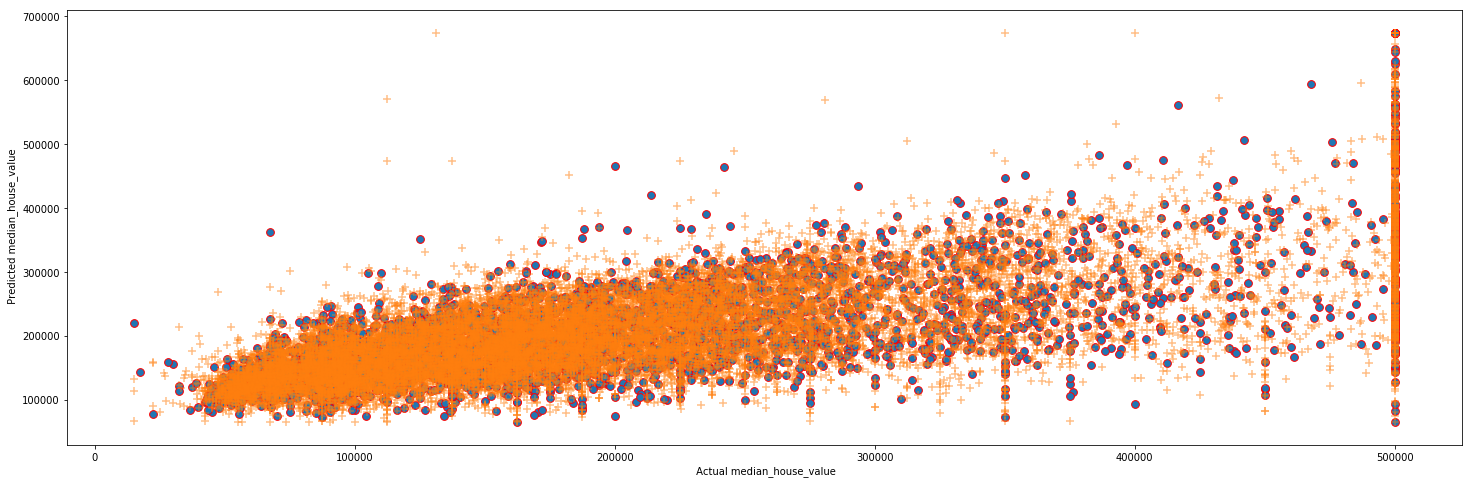

In [47]:
fig = figure(figsize=(25,8))
plt.scatter(y_test2,ypred2,marker="o",edgecolors = "r",s=60)
plt.scatter(y_train2,lin2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

Text(0,0.5,' Predicted median_house_value')

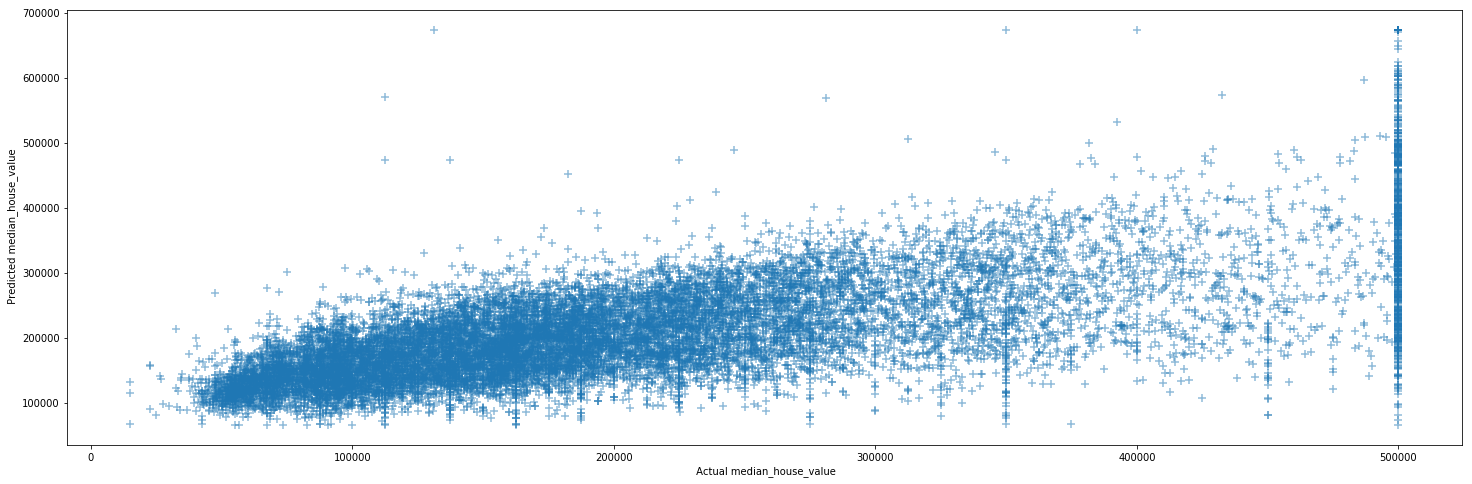

In [48]:
#fitted model for training data
fig = figure(figsize=(25,8))
plt.scatter(y_train2,lin2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

Text(0,0.5,' Predicted median_house_value')

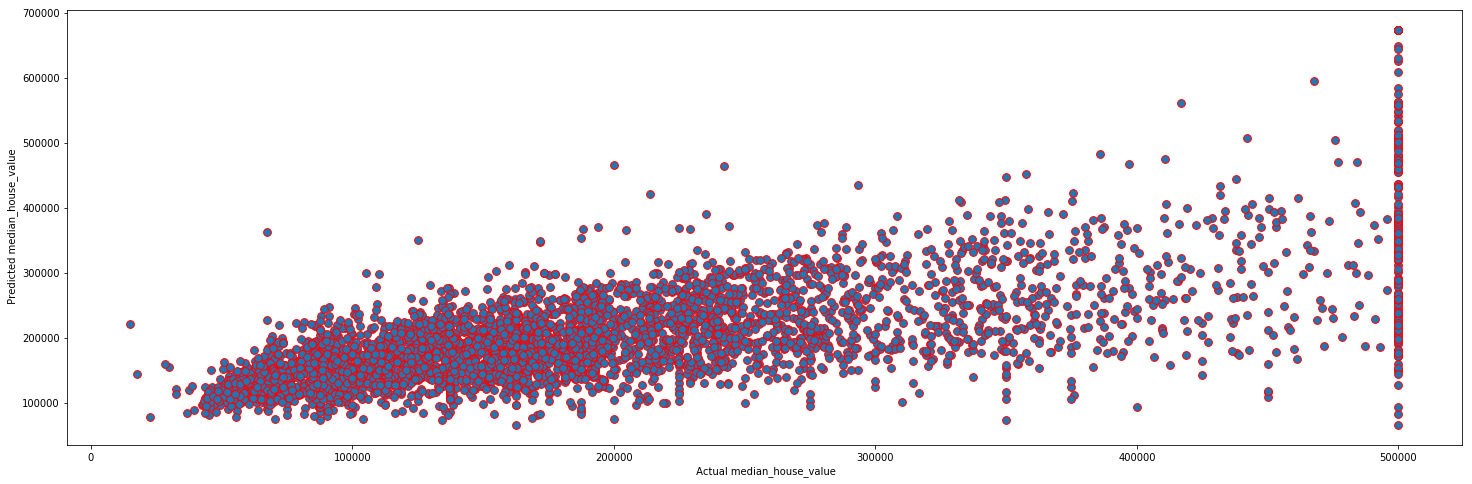

In [49]:
#fitted model for test data
fig = figure(figsize=(25,8))
plt.scatter(y_test2,lin2.predict(X_test2),marker="o",edgecolors = "r",s=60)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")